### Task - 4 : Exploratory Data Analysis on Terrorism

### Done By: Dewansh Vishwakarma

#### Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#### Loading the Dataset 

In [2]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = 'latin-1')

C:\Users\user\AppData\Local\Temp\ipykernel_5684\4146979813.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = 'latin-1')


#### Understanding the data 

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape

(181691, 135)

In [5]:
data.index

RangeIndex(start=0, stop=181691, step=1)

In [6]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [7]:
# Selecting Important Features
data = data[['iyear','imonth','iday','country_txt','region_txt','city',
             'latitude','longitude','location','attacktype1_txt','target1',
             'nkill','nwound','gname','summary','targtype1_txt','weaptype1_txt','motive']]

In [8]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace = 'True')

In [9]:
data.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,location,AttackType,Target,Killed,Wounded,Group,Summary,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,NaN,Assassination,Julio Guzman,1.0,0.0,MANO-D,NaN,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,NaN,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,23rd of September Communist League,NaN,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,NaN,Assassination,Employee,1.0,0.0,Unknown,NaN,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,NaN,Bombing/Explosion,U.S. Embassy,NaN,NaN,Unknown,NaN,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,NaN,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,Unknown,NaN,Government (Diplomatic),Incendiary,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   Region       181691 non-null  object 
 5   city         181256 non-null  object 
 6   latitude     177135 non-null  float64
 7   longitude    177134 non-null  float64
 8   location     55495 non-null   object 
 9   AttackType   181691 non-null  object 
 10  Target       181053 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Group        181691 non-null  object 
 14  Summary      115562 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [11]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [12]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              435
latitude         4556
longitude        4557
location       126196
AttackType          0
Target            638
Killed          10313
Wounded         16311
Group               0
Summary         66129
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [13]:
# Summary statistics
summary_stats = data[['Killed', 'Wounded']].describe()
summary_stats

,Killed,Wounded
count,171378.000000,165380.000000
mean,2.403272,3.167668
std,11.545741,35.949392
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,2.000000
max,1570.000000,8191.000000


### Data Exploration

In [14]:
# Time series analysis
yearly_incidents = data['Year'].value_counts().sort_index()
monthly_incidents = data.groupby('Month')['Year'].count()
daily_incidents = data.groupby(['Year', 'Month', 'Day'])['Day'].count()

In [15]:
# Geographical analysis
top_countries = data['Country'].value_counts().head(10)
region_distribution = data['Region'].value_counts()


In [16]:
# Categorical analysis
attack_types = data['AttackType'].value_counts()
target_types = data['Target_type'].value_counts()
weapon_types = data['Weapon_type'].value_counts()


### Data Visualization:

#### Q1. Where are the hotspots of terrorism?

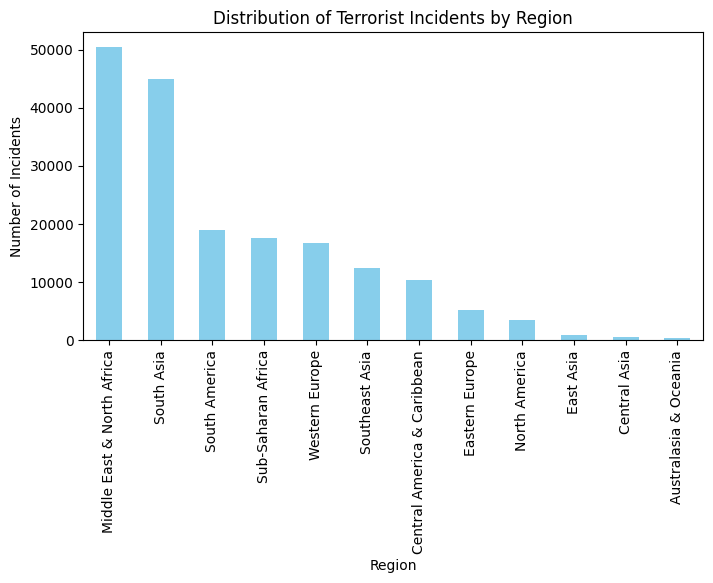

In [17]:
# Bar chart for region distribution
plt.figure(figsize=(8,4))
region_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Terrorist Incidents by Region')
plt.xticks(rotation=90)
plt.show()

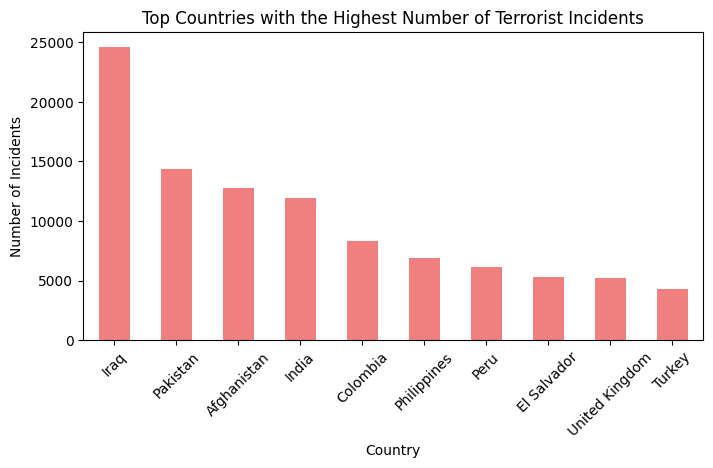

In [18]:
# Bar chart for top countries
plt.figure(figsize=(8,4))
top_countries.plot(kind='bar', color='lightcoral')
plt.xlabel('Country')
plt.ylabel('Number of Incidents')
plt.title('Top Countries with the Highest Number of Terrorist Incidents')
plt.xticks(rotation=45)
plt.show()


#### Q2. How have terrorist incidents evolved over time?

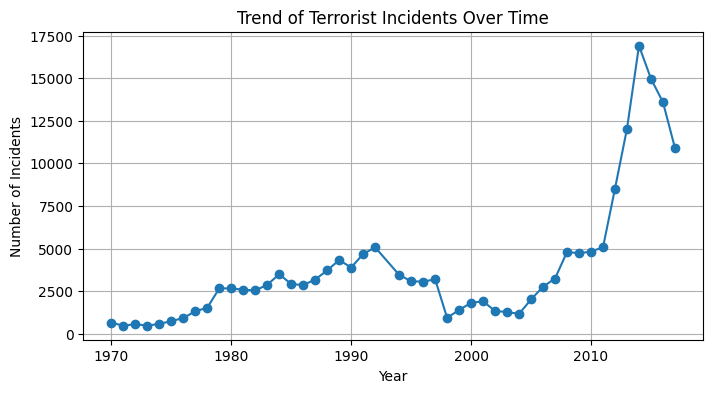

In [19]:
# Time series plot for yearly incidents
plt.figure(figsize=(8,4))
yearly_incidents.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('Trend of Terrorist Incidents Over Time')
plt.grid(True)
plt.show()


#### Q3. What are the most common attack types and their impact?

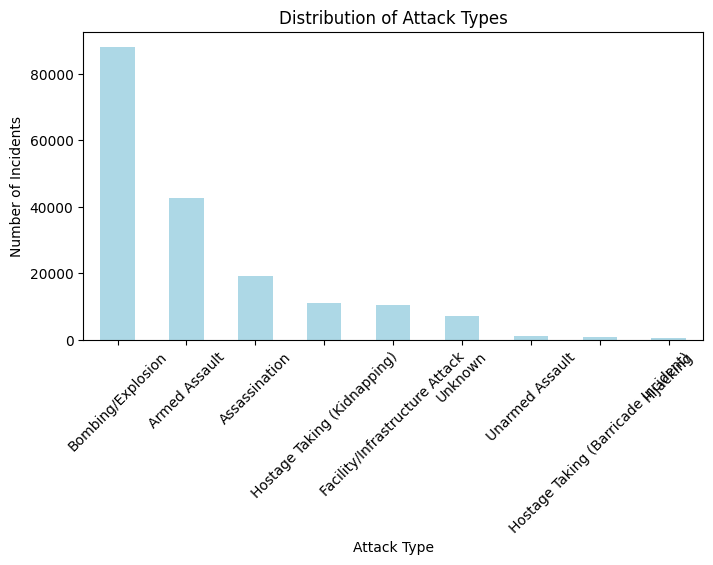

In [20]:
# Bar chart for attack types
plt.figure(figsize=(8, 4))
attack_types.plot(kind='bar', color='lightblue')
plt.xlabel('Attack Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Attack Types')
plt.xticks(rotation=45)
plt.show()


#### Q4. Who are the major perpetrators of terrorism?

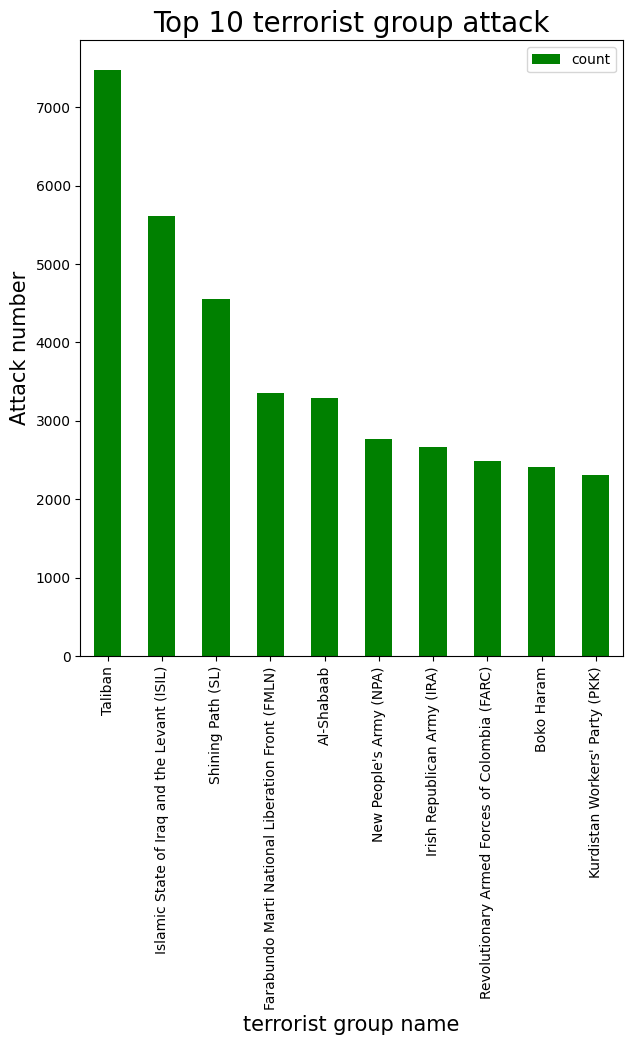

In [21]:
data['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='green',figsize=(7,8))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.xticks(rotation = 90)
plt.show()

#### Q5. What are the common targets and motives behind terrorist attacks?

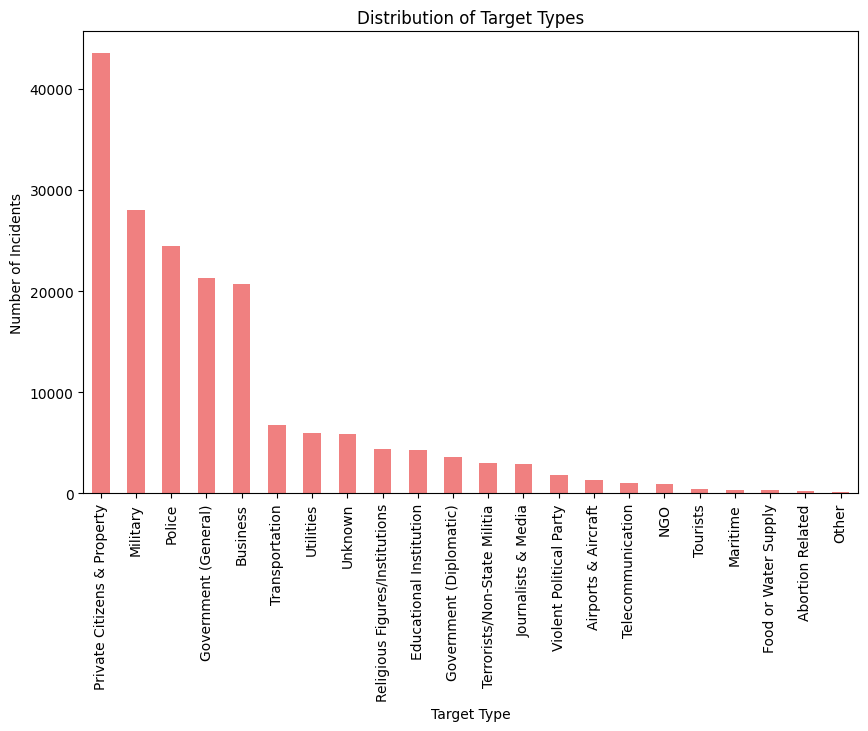

In [22]:
# Bar chart for target types
plt.figure(figsize=(10, 6))
target_types.plot(kind='bar', color='lightcoral')
plt.xlabel('Target Type')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Target Types')
plt.xticks(rotation=90)
plt.show()


#### Q6.Total Number of people killed in terror attack

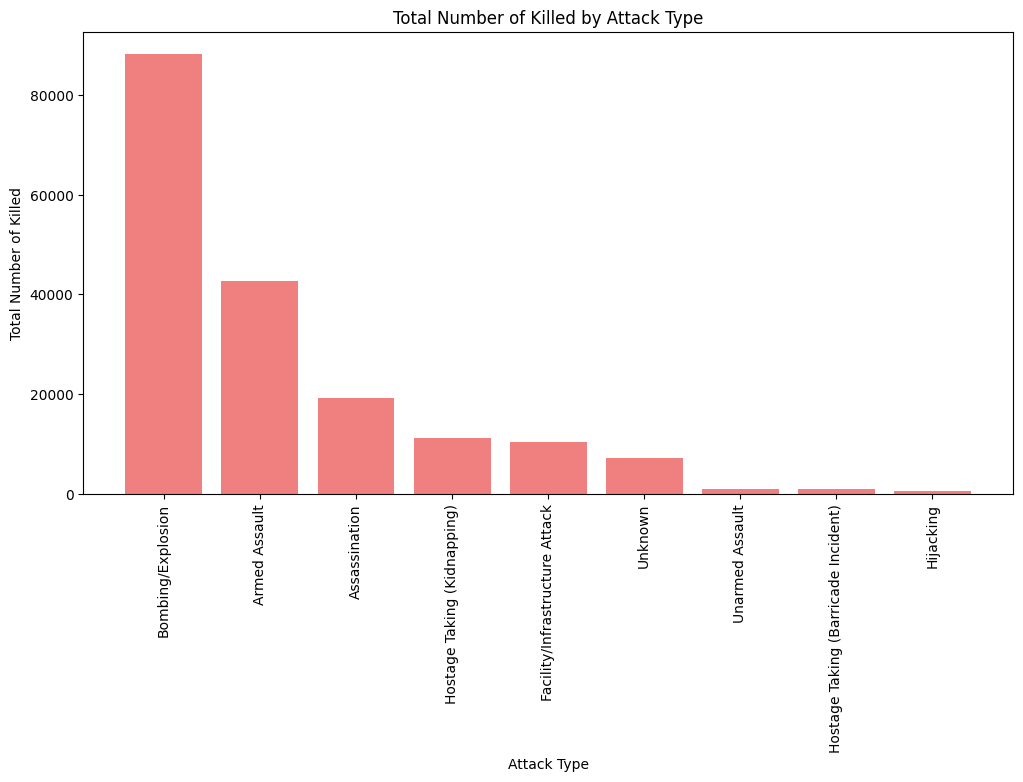

In [43]:
plt.figure(figsize=(12, 6))
plt.bar(attack_types.index, attack_types.values, color='lightcoral')
plt.xlabel('Attack Type')
plt.ylabel('Total Number of Killed')
plt.title('Total Number of Killed by Attack Type')
plt.xticks(rotation=90)
plt.show()
